# Лабораторна робота №3

## Злиття датафреймів, агрегування даних та візуалізація даних

In [17]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', '{:.3f}'.format)

In [18]:
# Вправа 1
Energy = pd.read_excel('En_In.xls', skiprows=17, skipfooter=38, usecols=[1, 3, 4, 5], names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'])
Energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669
1,Albania,102,35,100.000
2,Algeria,1959,51,0.551
3,American Samoa,...,...,0.641
4,Andorra,9,121,88.696
...,...,...,...,...
222,Viet Nam,2554,28,45.322
223,Wallis and Futuna Islands,0,26,0.000
224,Yemen,344,13,0.000
225,Zambia,400,26,99.715


In [19]:
# Вправа 2
Energy['Energy Supply'].replace("...", np.NaN, inplace=True)
Energy['Energy Supply per Capita'].replace("...", np.NaN, inplace=True)
Energy['Energy Supply'] = Energy['Energy Supply'] * 1000000
Energy.head(40)

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321000000.000,10.000,78.669
1,Albania,102000000.000,35.000,100.000
2,Algeria,1959000000.000,51.000,0.551
3,American Samoa,NaN,NaN,0.641
4,Andorra,9000000.000,121.000,88.696
5,Angola,642000000.000,27.000,70.909
6,Anguilla,2000000.000,136.000,0.000
7,Antigua and Barbuda,8000000.000,84.000,0.000
8,Argentina,3378000000.000,79.000,24.065
9,Armenia,143000000.000,48.000,28.236


In [20]:
# Вправа 3
country_mapping = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}

Energy['Country'].replace(country_mapping, inplace=True)
Energy.loc[Energy['Country'].isin(['South Korea', 'United States', 'United Kingdom', 'Hong Kong'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
43,Hong Kong,585000000.000,82.000,0.000
164,South Korea,11007000000.000,221.000,2.279
214,United Kingdom,7920000000.000,124.000,10.600
216,United States,90838000000.000,286.000,11.571


In [21]:
# Вправа 4
Energy['Country'].replace(to_replace = r'\d+', value = '', regex = True, inplace = True)
Energy['Country'] = Energy['Country'].replace(to_replace = r'\(.*\)', value = '', regex = True).str.strip()
Energy.loc[Energy['Country'].isin(['American Samoa', 'Switzerland', 'Bolivia'])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,NaN,NaN,0.641
24,Bolivia,336000000.000,32.000,31.477
197,Switzerland,1113000000.000,136.000,57.745


In [22]:
# Вправа 5
GDP = pd.read_csv('gpd.csv', skiprows=4)

gdp_mapping = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}

GDP['Country Name'].replace(gdp_mapping, inplace=True)
GDP.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2467703910.615,NaN,NaN,NaN,NaN,NaN


In [23]:
# Вправа 6
scimago = pd.read_excel('scimagojr.xlsx')
scimago

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.700,138
1,2,United States,96661,94747,792274,265436,8.200,230
2,3,Japan,30504,30287,223024,61554,7.310,134
3,4,United Kingdom,20944,20357,206091,37874,9.840,139
4,5,Russian Federation,18534,18301,34266,12422,1.850,57
...,...,...,...,...,...,...,...,...
186,187,Guyana,1,1,0,0,0.000,0
187,188,Christmas Island,1,1,0,0,0.000,0
188,189,Reunion,1,1,2,1,2.000,1
189,190,Saint Lucia,1,1,0,0,0.000,0


In [24]:
# Вправа 7
merged_df = pd.merge(scimago, Energy, left_on='Country', right_on='Country')
merged_df = pd.merge(merged_df, GDP, left_on='Country', right_on='Country Name')

selected_columns = ['Country', 'Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
                     'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable',
                     '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

Result = merged_df[selected_columns].set_index('Country').head(15)

Result.head(3)
#Result.shape

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.700,138,127191000000.000,93.000,19.755,3992331462570.890,4559041383517.930,4997775145605.960,5459247267275.140,6039658508485.590,6612490294273.650,7124977970399.610,7672447738017.420,8230120617793.520,8797998940421.279
United States,2,96661,94747,792274,265436,8.200,230,90838000000.000,286.000,11.571,14792303791800.000,15055395304800.000,15011490541400.000,14594842181900.000,14964372000000.000,15204019634600.000,15542161722300.000,15773666098800.000,16156618476000.000,16548573278300.000
Japan,3,30504,30287,223024,61554,7.310,134,18984000000.000,149.000,10.233,5496541517363.310,5617035943770.730,5558526873313.820,5251308399909.320,5498717815809.770,5473738114222.050,5569101602926.180,5644658523313.420,5642884448582.190,5669563143140.970


In [25]:
# Вправа 8 (середній ВВП країн за останні 10 років)
def task_eight():
    gdp_columns = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    gdp_data = Result[gdp_columns]

    avgGDP = gdp_data.mean(axis=1)
    avgGDP = avgGDP.sort_values(ascending=False)

    return avgGDP

task_eight()

Country
United States        15364344302990.000
China                 6348608932836.100
Japan                 5542207638235.176
Germany               3493025339072.848
France                2681724635761.589
United Kingdom        2487906661418.417
Brazil                2189794143774.905
Italy                 2120175089933.776
India                 1769297396603.860
Canada                1660647466307.512
Russian Federation    1565459478480.661
Spain                 1418078278145.694
Australia             1164042729991.427
South Korea           1106714508244.852
Iran                   444155754051.095
dtype: float64

In [26]:
# Вправа 9 (зміна ВВП за останні 10 років для країни з 5-м середнім ВВП.)
def task_nine():
    gdp_columns = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    
    fifth_highest_gdp_country = task_eight().index[4]

    gdp_values = Result.loc[fifth_highest_gdp_country, gdp_columns]

    gdp_change = gdp_values['2015'] - gdp_values['2006']

    return (fifth_highest_gdp_country, gdp_change)

task_nine()

('France', 153345695364.24023)

In [27]:
# Вправа 10 (країна з максимимальним відсотком поновлюваних джерел енергії)
def task_ten():
    max_renewable_country = Result['% Renewable'].idxmax()
    
    max_renewable_percentage = Result.loc[max_renewable_country, '% Renewable']
    
    return (max_renewable_country, max_renewable_percentage)

task_ten()

('Brazil', 69.64803)

In [28]:
# Вправа 11 (визначення чисельності населення за споживанням електроенергії, яка країна є шостою за цим показником)
def task_eleven():
    Result['Population Estimate'] = Result['Energy Supply'] / Result['Energy Supply per Capita']
    
    sorted = Result.sort_values(by='Population Estimate', ascending=False)
    
    sixth_country = sorted.iloc[5]
    
    return (sixth_country.name, sixth_country['Population Estimate'])

task_eleven()

('Japan', 127409395.97315437)

In [29]:
# Вправа 12 (взаємозв'язок між кількістю цитованих документів на душу населення та енергозабезпеченням на душу населення)
def task_twelve():
    Result['Citations per Capita'] = Result['Citable documents'] / Result['Population Estimate']
    
    correlation = Result['Citations per Capita'].corr(Result['Energy Supply per Capita'])

    return correlation

task_twelve()

0.7940010435442946

In [30]:
# Вправа 13 (1, якщо значення % відновлюваної енергії країни дорівнює або вище медіани і 0, якщо значення (% Renewable) нижче медіани.)
def task_thirteen():
    median_renewable = Result['% Renewable'].median()
    Result['High Renewable'] = (Result['% Renewable'] >= median_renewable).astype(int)
    return Result.sort_values(by='Rank')['High Renewable']

task_thirteen()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: High Renewable, dtype: int32

In [31]:
# Вправа 14 (розмір вибірки (кількість країн на кожному континенті), а також суму, середнє та стандартне відхилення для оцінки кількості населення)
def task_fourteen():
    ContinentDict = {'China':'Asia', 'United States':'North America', 'Japan':'Asia', 'United Kingdom':'Europe',
                     'Russian Federation':'Europe', 'Canada':'North America', 'Germany':'Europe', 'India':'Asia',
                     'France':'Europe', 'South Korea':'Asia', 'Italy':'Europe', 'Spain':'Europe', 'Iran':'Asia',
                     'Australia':'Australia', 'Brazil':'South America'}

    Result['Continent'] = Result.index.map(ContinentDict)

    grouped = Result.groupby('Continent')['Population Estimate'].agg(['size', 'sum', 'mean', 'std'])

    grouped.index.name = 'Continent'
    grouped.columns = ['size', 'sum', 'mean', 'std']
    return grouped

task_fourteen()

,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.611,579733277.322,679097888.366
Australia,1,23316017.316,23316017.316,NaN
Europe,6,457929667.216,76321611.203,34647667.066
North America,2,352855249.480,176427624.740,199669644.857
South America,1,205915254.237,205915254.237,NaN


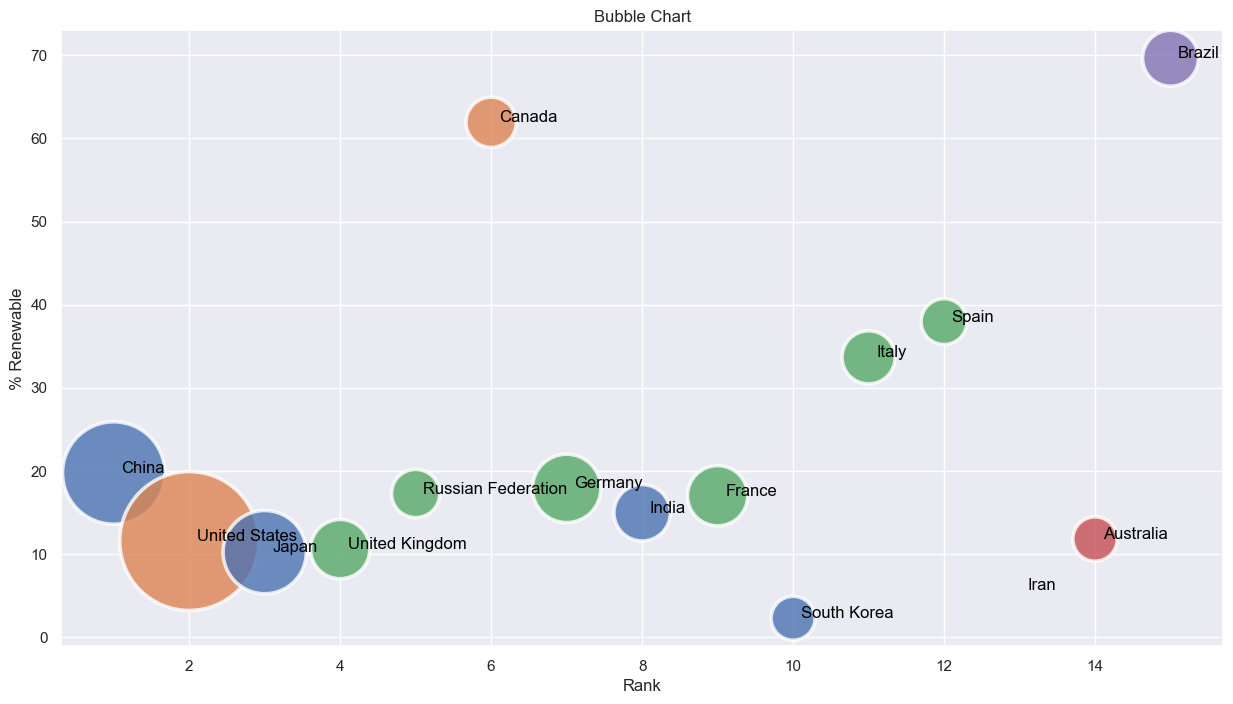

In [32]:
# Вправа 15 (бульбашкова діаграма, що відображає залежність % поновлюваних джерел від рейтингу країни (% Renewable vs. Rank))
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.figure(figsize=(15, 8))
bubble_chart = sns.scatterplot(x='Rank', y='% Renewable', size='2015', hue='Continent', data=Result, sizes=(1000, 10000),
                               alpha= 0.8, palette=None)

for line in range(0, Result.shape[0]):
    bubble_chart.text(Result['Rank'].iloc[line] + 0.1, Result['% Renewable'].iloc[line], Result.index[line],
                      horizontalalignment='left', size='medium', color='black')

plt.title('Bubble Chart')
plt.xlabel('Rank')
plt.ylabel('% Renewable')

bubble_chart.legend().set_visible(False)

plt.show()